In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [69]:
COLORS = {
    'bg': '#F2E6D0',
    'fg': '#011526',
    'fg_faded': '#97A69B',
    'accent0': '#03738C',
    'accent1': '#D97904'
}

In [70]:
df_characters = pd.read_csv('data/aa_characters.csv')
df_games = pd.read_csv('data/aa_games.csv', parse_dates=['release_date_earliest', 'release_date_collection'], dayfirst=True)
df_cases = pd.read_csv('data/aa_cases.csv', parse_dates=['event_date_low', 'event_date_high'], dayfirst=True)
df_characters

,id,full_name,fan_full_name,display_name,fan_display_name,gender,nationality,birth_year_low,birth_year_high,death_year_low,death_year_high,alive,height_cm,debut_game,games,debut_case,offspring_count,kill_count
0,0,Frank Sahwit,NaN,Sahwit,NaN,MALE,United States,1972.0,1972.0,NaN,NaN,True,166.0,PW_AA,"PW_AA, AAI2",1-1,0,1
1,1,Cindy Stone,NaN,NaN,NaN,FEMALE,United States,1994.0,1994.0,2016.0,2016.0,False,169.0,PW_AA,PW_AA,1-1,0,0
2,2,Phoenix Wright,NaN,Phoenix,NaN,MALE,United States,1992.0,1993.0,NaN,NaN,True,176.0,PW_AA,"PW_AA, PW_JFA, PW_TT, AJ_AA, AAI, AAI2, PL_VS_...",1-1,0,0
3,3,Mia Fey,NaN,Mia,NaN,FEMALE,United States,1989.0,1989.0,2016.0,2016.0,False,168.0,PW_AA,"PW_AA, PW_TT",1-1,0,0
4,4,Larry Butz,NaN,Butz,NaN,MALE,United States,1993.0,1994.0,NaN,NaN,True,177.0,PW_AA,"PW_AA, PW_JFA, PW_TT, AAI, AAI2",1-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,315,Faitah Inmee,NaN,NaN,NaN,MALE,Khura'in,2028.0,2028.0,NaN,NaN,True,NaN,PW_SOJ,PW_SOJ,6-3,0,0
316,316,Lady Kee'ra,NaN,NaN,NaN,FEMALE,Khura'in,NaN,NaN,NaN,NaN,False,NaN,PW_SOJ,PW_SOJ,6-3,0,0
317,317,Puhray Zeh'lot,NaN,NaN,NaN,MALE,Khura'in,2007.0,2028.0,NaN,NaN,False,NaN,PW_SOJ,PW_SOJ,6-3,0,0
318,318,Geiru Toneido,NaN,NaN,NaN,FEMALE,United States,1994.0,1994.0,NaN,NaN,True,NaN,PW_SOJ,PW_SOJ,6-4,0,1


In [71]:
def mask_outliers(arr: np.ndarray) -> np.ndarray:
    q1 = np.percentile(arr, 25)
    q3 = np.percentile(arr, 75)
    iqr = q3 - q1
    outlier_mask = (arr < q1 - 1.5 * iqr) & (arr > q3 + 1.5 * iqr)
    return outlier_mask

def rgb_from_hex_code(hex_code: str) -> tuple[float, float, float]:
    hex_code = hex_code.lstrip('#')
    r = int(hex_code[0:2], 16) / 255
    g = int(hex_code[2:4], 16) / 255
    b = int(hex_code[4:6], 16) / 255
    return r, g, b

def parse_str_list(string: str, delimiter: str = ',', do_strip: bool = True) -> list[str]:
    return [s.strip() if do_strip else s for s in string.split(delimiter)]

In [72]:
df_characters_viz = df_characters.copy()
df_characters_viz['games'] = df_characters_viz['games'].map(parse_str_list)
df_characters_viz = df_characters_viz.explode('games')
df_characters_viz

,id,full_name,fan_full_name,display_name,fan_display_name,gender,nationality,birth_year_low,birth_year_high,death_year_low,death_year_high,alive,height_cm,debut_game,games,debut_case,offspring_count,kill_count
0,0,Frank Sahwit,NaN,Sahwit,NaN,MALE,United States,1972.0,1972.0,NaN,NaN,True,166.0,PW_AA,PW_AA,1-1,0,1
0,0,Frank Sahwit,NaN,Sahwit,NaN,MALE,United States,1972.0,1972.0,NaN,NaN,True,166.0,PW_AA,AAI2,1-1,0,1
1,1,Cindy Stone,NaN,NaN,NaN,FEMALE,United States,1994.0,1994.0,2016.0,2016.0,False,169.0,PW_AA,PW_AA,1-1,0,0
2,2,Phoenix Wright,NaN,Phoenix,NaN,MALE,United States,1992.0,1993.0,NaN,NaN,True,176.0,PW_AA,PW_AA,1-1,0,0
2,2,Phoenix Wright,NaN,Phoenix,NaN,MALE,United States,1992.0,1993.0,NaN,NaN,True,176.0,PW_AA,PW_JFA,1-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,315,Faitah Inmee,NaN,NaN,NaN,MALE,Khura'in,2028.0,2028.0,NaN,NaN,True,NaN,PW_SOJ,PW_SOJ,6-3,0,0
316,316,Lady Kee'ra,NaN,NaN,NaN,FEMALE,Khura'in,NaN,NaN,NaN,NaN,False,NaN,PW_SOJ,PW_SOJ,6-3,0,0
317,317,Puhray Zeh'lot,NaN,NaN,NaN,MALE,Khura'in,2007.0,2028.0,NaN,NaN,False,NaN,PW_SOJ,PW_SOJ,6-3,0,0
318,318,Geiru Toneido,NaN,NaN,NaN,FEMALE,United States,1994.0,1994.0,NaN,NaN,True,NaN,PW_SOJ,PW_SOJ,6-4,0,1


In [73]:
df_characters_viz.shape[0]

441

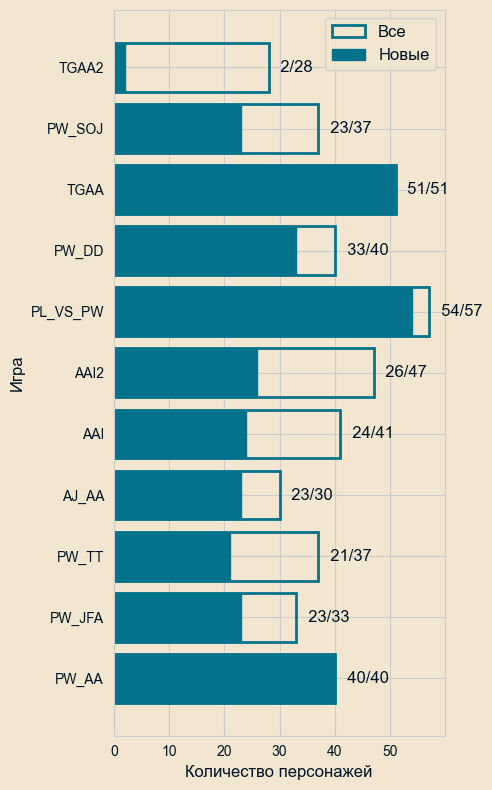

Character Distribution by Game:
    game  new_count  recurring_count  total_count
   PW_AA         40                0           40
  PW_JFA         23               10           33
   PW_TT         21               16           37
   AJ_AA         23                7           30
     AAI         24               17           41
    AAI2         26               21           47
PL_VS_PW         54                3           57
   PW_DD         33                7           40
    TGAA         51                0           51
  PW_SOJ         23               14           37
   TGAA2          2               26           28


In [74]:
plt.rcParams['figure.facecolor'] = COLORS['bg']  # Off-white background
plt.rcParams['axes.facecolor'] = COLORS['bg']
plt.rcParams['text.color'] = COLORS['fg']        # Dark blue text
plt.rcParams['axes.labelcolor'] = COLORS['fg']
plt.rcParams['xtick.color'] = COLORS['fg']
plt.rcParams['ytick.color'] = COLORS['fg']

# First, let's get the game release order
game_order = df_games.sort_values('release_date_earliest')['acronym'].tolist()

# Prepare the data for visualization
def calculate_character_types(df_characters_viz, game_order):
    results = []

    for game in game_order:
        # Characters who debuted in this game (NEW)
        new_chars = df_characters_viz[
            (df_characters_viz['debut_game'] == game) &
            (df_characters_viz['games'] == game)
            ]

        # All characters appearing in this game (TOTAL = NEW + RECURRING)
        total_chars = df_characters_viz[df_characters_viz['games'] == game]

        # Recurring characters (appear in this game but debuted earlier)
        recurring_chars = total_chars[total_chars['debut_game'] != game]

        results.append({
            'game': game,
            'new_count': len(new_chars),
            'recurring_count': len(recurring_chars),
            'total_count': len(total_chars)
        })

    return pd.DataFrame(results)

# Calculate the data
character_stats = calculate_character_types(df_characters_viz, game_order)

# Create the horizontal bar plot
plt.figure(figsize=(5, 8))

# Set up the plot
games = character_stats['game']
y_pos = np.arange(len(games))

# Create the bars - total (outline) and new (filled)
plt.barh(y_pos, character_stats['total_count'],
         color='none', edgecolor=COLORS['accent0'], linewidth=2, label='Все')
plt.barh(y_pos, character_stats['new_count'],
         color=COLORS['accent0'], edgecolor=COLORS['accent0'], label='Новые')

# Customize the plot
plt.yticks(y_pos, games)
plt.xlabel('Количество персонажей', fontsize=12)
plt.ylabel('Игра', fontsize=12)
plt.legend(fontsize=12)

# Add value labels
for i, (new, total) in enumerate(zip(character_stats['new_count'], character_stats['total_count'])):
    plt.text(total + 0.5, i, f'  {new}/{total}', va='center', fontsize=12)

plt.tight_layout()
plt.savefig('characters_new_vs_recurring.svg', format='svg', transparent=True, bbox_inches='tight', dpi=300)
plt.show()

# Print some stats
print("Character Distribution by Game:")
print(character_stats.to_string(index=False))

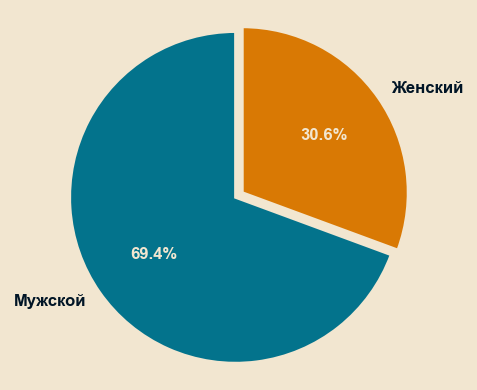

Gender Distribution:
gender
Мужской    222
Женский     98
Name: count, dtype: int64

Total characters: 320


In [75]:
df_characters_viz_2 = df_characters.copy()
gender_ru_remappings = {
    'MALE': 'Мужской',
    'FEMALE': 'Женский'
}
genders = df_characters_viz_2['gender']
genders = genders.map(lambda g: gender_ru_remappings[g])
gender_counts = genders.value_counts()

# Create pie chart with custom styling
plt.figure(figsize=(5, 4))

# Colors using your analogous harmony
colors = [COLORS['accent0'], COLORS['accent1']]  # Dark blue, Purple
explode = (0.05, 0)  # Slightly explode the first slice for emphasis

# Create pie chart
wedges, texts, autotexts = plt.pie(gender_counts.values,
                                   labels=gender_counts.index,
                                   autopct='%1.1f%%',
                                   colors=colors,
                                   explode=explode,
                                   startangle=90,
                                   textprops={'fontsize': 12, 'color': COLORS['fg']},
                                   wedgeprops={'edgecolor': COLORS['bg'], 'linewidth': 2})

# Customize the percentage labels
for autotext in autotexts:
    autotext.set_color(COLORS['bg'])  # White text on colored background
    autotext.set_fontweight('bold')
    autotext.set_fontsize(12)

# Customize the main labels
for text in texts:
    text.set_fontsize(12)
    text.set_fontweight('bold')

# Equal aspect ratio ensures the pie is circular
plt.axis('equal')

# Add background color
fig = plt.gcf()
fig.patch.set_facecolor(COLORS['bg'])

plt.tight_layout()
plt.savefig('gender_distribution_pie.svg',
            format='svg',
            transparent='True',
            bbox_inches='tight',
            dpi=300,
            facecolor=COLORS['bg'],
            edgecolor='none')
plt.show()

# Print the counts
print("Gender Distribution:")
print(gender_counts)
print(f"\nTotal characters: {gender_counts.sum()}")

In [79]:
df_characters_viz_3 = df_characters.copy()
heights = df_characters_viz_3['height_cm'].dropna()

heights_q1 = heights.quantile(0.25)
heights_q3 = heights.quantile(0.75)
iqr = heights_q3 - heights_q1

df_characters_viz_3['height_cm']

0      166.0
1      169.0
2      176.0
3      168.0
4      177.0
       ...  
315      NaN
316      NaN
317      NaN
318      NaN
319      NaN
Name: height_cm, Length: 320, dtype: float64

Total characters with height: 167
Inliers: 165, Outliers: 2


NameError: name 'high_bin' is not defined

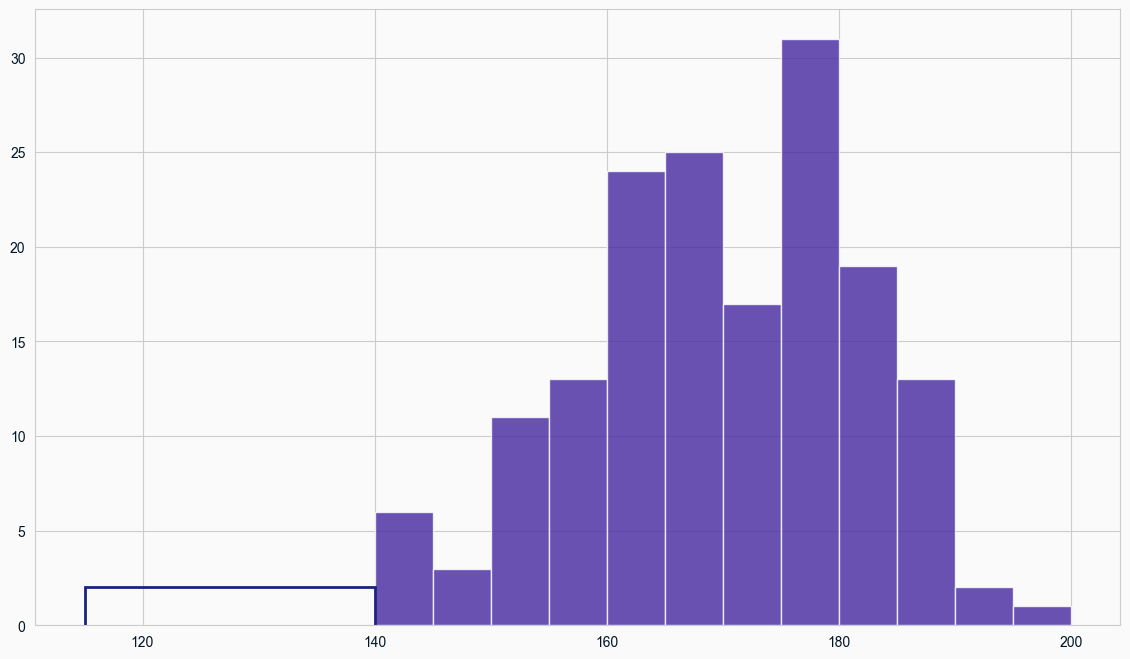

In [81]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def mask_outliers(arr: np.ndarray) -> np.ndarray:
    q1 = np.percentile(arr, 25)
    q3 = np.percentile(arr, 75)
    iqr = q3 - q1
    outlier_mask = (arr < q1 - 1.5 * iqr) | (arr > q3 + 1.5 * iqr)
    return outlier_mask

# Prepare the data
height_data = df_characters['height_cm'].dropna()
outlier_mask = mask_outliers(height_data.values)
inlier_data = height_data[~outlier_mask]
outlier_data = height_data[outlier_mask]

print(f"Total characters with height: {len(height_data)}")
print(f"Inliers: {len(inlier_data)}, Outliers: {len(outlier_data)}")

# Create bin edges using Sturges' rule for inliers
n_bins = int(np.ceil(np.log2(len(inlier_data))) + 1)  # Sturges' rule
bin_width = 5  # As per your notation

# Find nice bin boundaries around the inlier range
inlier_min = inlier_data.min()
inlier_max = inlier_data.max()

# Create bins centered around the data
lower_bound = np.floor(inlier_min / bin_width) * bin_width
upper_bound = np.ceil(inlier_max / bin_width) * bin_width
inlier_bins = np.arange(lower_bound, upper_bound + bin_width, bin_width)

# Create the plot
plt.figure(figsize=(14, 8))
fig = plt.gcf()
fig.patch.set_facecolor('#fafafa')
ax = plt.gca()
ax.set_facecolor('#fafafa')

# Colors
inlier_color = '#4527a0'  # Purple fill
outlier_color = '#1a237e'  # Dark blue outline
text_color = '#1a237e'

# Plot inliers (filled bars)
inlier_heights, inlier_edges, _ = ax.hist(inlier_data, bins=inlier_bins,
                                          color=inlier_color, alpha=0.8,
                                          edgecolor='white', linewidth=1,
                                          label='Typical Heights (Inliers)')

# Plot outliers (outlined bars) if they exist
if len(outlier_data) > 0:
# Separate low and high outliers
    low_outliers = outlier_data[outlier_data < inlier_bins[0]]
high_outliers = outlier_data[outlier_data > inlier_bins[-1]]

# Plot low outliers
if len(low_outliers) > 0:
    low_bin = [height_data.min() - 5, inlier_bins[0]]  # Extra space for label
ax.hist(low_outliers, bins=low_bin,
        histtype='step', edgecolor=outlier_color, linewidth=2,
        fill=False, linestyle='-', label='Outliers')

# Plot high outliers
if len(high_outliers) > 0:
    high_bin = [inlier_bins[-1], height_data.max() + 5]  # Extra space for label
ax.hist(high_outliers, bins=high_bin,
        histtype='step', edgecolor=outlier_color, linewidth=2,
        fill=False, linestyle='-')

# Customize x-axis labels
bin_labels = []
if len(outlier_data) > 0 and len(low_outliers) > 0:
    bin_labels.append(f'<{inlier_bins[0]}')

# Add inlier bin labels
for i in range(len(inlier_bins) - 1):
    bin_labels.append(f'{int(inlier_bins[i])}..{int(inlier_bins[i+1])}')

if len(outlier_data) > 0 and len(high_outliers) > 0:
    bin_labels.append(f'>{inlier_bins[-1]}')

# Set x-ticks at bin centers if we have inliers
if len(inlier_bins) > 1:
    bin_centers = (inlier_bins[:-1] + inlier_bins[1:]) / 2
x_ticks = bin_centers

# Add positions for outlier labels if needed
if len(outlier_data) > 0:
    if len(low_outliers) > 0:
        x_ticks = np.insert(x_ticks, 0, (height_data.min() + inlier_bins[0]) / 2)
    if len(high_outliers) > 0:
        x_ticks = np.append(x_ticks, (inlier_bins[-1] + height_data.max()) / 2)

ax.set_xticks(x_ticks)
ax.set_xticklabels(bin_labels, rotation=45, ha='right')

# Customize the plot
ax.set_xlabel('Height (cm)', color=text_color, fontsize=12)
ax.set_ylabel('Number of Characters', color=text_color, fontsize=12)
ax.set_title('Distribution of Character Heights in Ace Attorney',
             color=text_color, fontsize=16, fontweight='bold', pad=20)

# Customize spines and grid
ax.spines['top'].set_color(text_color)
ax.spines['right'].set_color(text_color)
ax.spines['bottom'].set_color(text_color)
ax.spines['left'].set_color(text_color)
ax.grid(True, axis='y', alpha=0.3, color=text_color)

# Add value labels on bars
for i, (height, edge_left, edge_right) in enumerate(zip(inlier_heights, inlier_edges[:-1], inlier_edges[1:])):
    if height > 0:
        ax.text((edge_left + edge_right) / 2, height + 0.1, f'{int(height)}',
        ha='center', va='bottom', fontsize=9, color=text_color)

# Add legend if we have outliers
if len(outlier_data) > 0:
    ax.legend(facecolor='#f0f0f0', edgecolor=text_color,
              labelcolor=text_color, framealpha=0.9)

plt.tight_layout()
plt.savefig('height_distribution.svg', format='svg',
            bbox_inches='tight', dpi=300,
            facecolor='#fafafa', edgecolor='none')
plt.show()

# Print statistics
print(f"\nHeight Statistics:")
print(f"Min: {height_data.min():.1f} cm")
print(f"Max: {height_data.max():.1f} cm")
print(f"Mean: {height_data.mean():.1f} cm")
print(f"Median: {height_data.median():.1f} cm")
print(f"Q1: {np.percentile(height_data, 25):.1f} cm")
print(f"Q3: {np.percentile(height_data, 75):.1f} cm")